In [71]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import timeit
import random

from PIL import Image
%matplotlib inline
import math
import pylab as P
import PIL

In [72]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [73]:
Xtr_path = "Xtr.csv"
Xte_path = "Xte.csv"
Ytr_path = "Ytr.csv"

In [74]:
Xtr = genfromtxt(Xtr_path, delimiter = ',')
Ytr = genfromtxt(Ytr_path, delimiter = ',')
Xte = genfromtxt(Xte_path, delimiter = ',')

In [75]:
Ytr_keep = Ytr
Xtr_keep = Xtr
Xte_keep = Xte

In [76]:
Ytr = Ytr_keep
Ytr = Ytr[1:]

In [77]:
#check
print Xtr
print np.shape(Ytr)
print Ytr, np.shape(Ytr)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(5000, 2)
[[  1.00000000e+00   6.00000000e+00]
 [  2.00000000e+00   2.00000000e+00]
 [  3.00000000e+00   2.00000000e+00]
 ..., 
 [  4.99800000e+03   5.00000000e+00]
 [  4.99900000e+03   6.00000000e+00]
 [  5.00000000e+03   8.00000000e+00]] (5000, 2)


In [78]:
#Construire le premier SVM - 2 classes
##On n'a pas encore choisi l'approche one-against-one ou one-against-all

##Choisir ceux des classes 1 et 2 pour voir
Ytr1 = np.array([[int(a[0]), int(a[1])] for a in Ytr if int(a[1]) in [1,2]])

## Ytr commence à indice 1
## Xtr n'a pas d'indice - commence donc comme numpy à 0
## Remettons l'indice de Ytr1 à la bonne translation
indx1 = Ytr1[:, 0] - 1
Xtr1 = Xtr[indx1,:] #
Ytr1 = Ytr1[:, 1] #enlever les indices
Ytr1[Ytr1 == 2] = -1 #Préparer pour le svm

In [96]:
def display_digit(l):
    a = np.reshape(l, (28, 28), order = 'F')
    plt.imshow(a, cmap="Greys_r")
    plt.show()
    plt.close()

-1


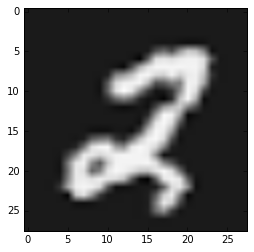

In [97]:
##Check l'alignement de Xtr1 et Ytr1 
i = 110
y = Ytr1[i]
x = Xtr1[i]
print y
display_digit(x)

In [115]:
def SVMPegasos(x,y, lambd, iterations):
    [m,d] = np.array(np.shape(x))
    w = np.zeros(d)
    t = 1
    for i in range(1, iterations + 1):
        for tau in range(0, m-1):
            tau_r = random.randint(0,m-1) 
            if(y[tau_r]*np.vdot(w, x[tau_r,:]) < 1):
                w = (1-1/t)*w + 1/(lambd*t)*y[tau_r]*x[tau_r,:]
            else:
                w = (1-1/t)*w
            t = t + 1
    c1 = 1 - (y*(np.dot(x,w)))
    c1[c1 < 0] = 0
    cost = np.vdot(w,w) + lambd*(sum(c1))
    print w    
    print cost 
    return w
#http://ttic.uchicago.edu/~nati/Publications/PegasosMPB.pdf

In [152]:
%time w = SVMPegasos(Xtr1, Ytr1, 0.01, 100)

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.42198096e-05  -1.06315749e-04  -1.16969612e-03  -6.96735915e-05
   1.81476343e-05   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -1.32820426e-02   5.97095093e-02   3.34264667e-01
   5.92709788e-01   5.72987588e-01   2.02778376e-01   1.56056701e-02
  -5.31810000e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -3.86330690e-03   2.67403511e-02   1.54556374e-01   7.78595578e-03
  -3.10471038e-02  -2.25538424e-02  -8.36479957e-03  -2.53468244e-03
  -2.16837652e-03   2.37451272e-04   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -1.49060987e-04

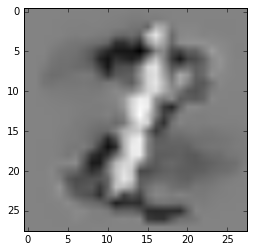

In [153]:
display_digit(w)

In [125]:
def solution_SVM(x, w):
    if (np.vdot(w.T,x) < 1):
        y = -1
    else:
        y = 1
    return y

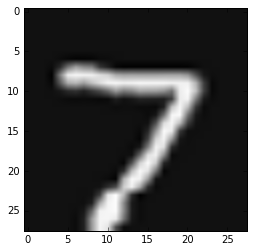

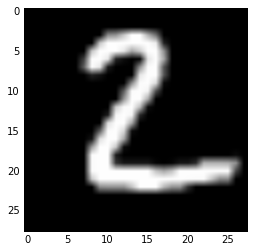

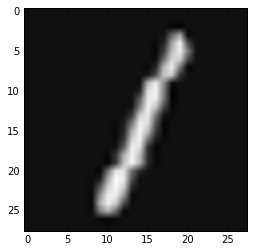

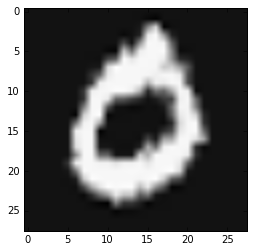

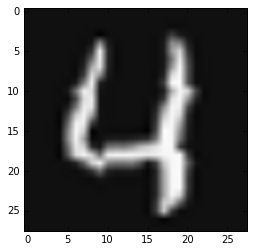

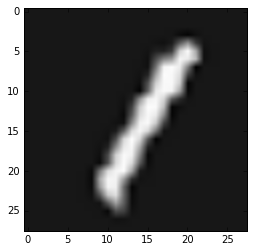

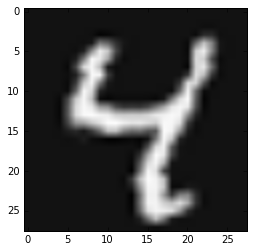

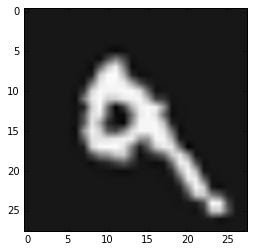

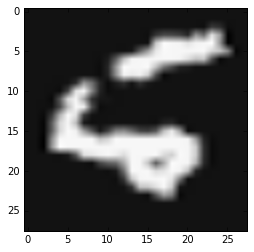

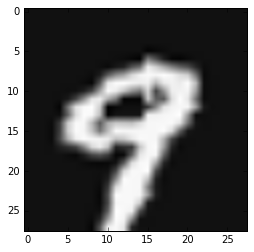

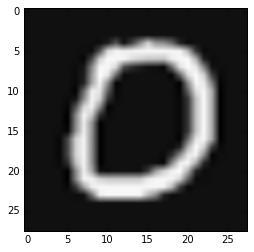

KeyboardInterrupt: 

In [150]:
for i in range(100):
    display_digit(Xte[i])

In [101]:
Hundred_first_Xte = [7,2,1,0,4,1,4,9,6,9,0, 6, 9, 0 ,1, 5, 9, 7, 3, 4,9,6,6, 5, 4, 0,7, 4,0,1,3
 ,1,3,4,7,2,7,1,2,1,1,7,4,2,3,5,1,2,4,4,6,3,5,5,6, 0,4,1,9,5,7,8,9,3,7,4,6,4,3,0,7,0,2,9,1,7,3,2,9,7,7
 ,6,2,7,8,4,7,3,6,1,3,6,9,3,1,4,1,7,6,9]

In [120]:
indx_100_1_2 = [x for x in range(len(Hundred_first_Xte)) if Hundred_first_Xte[x] in [1,2]]

In [123]:
Xte1 = Xte[indx_100_1_2]

-1


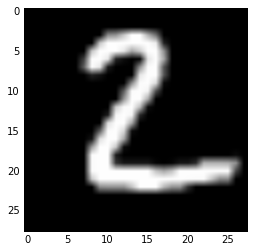

1


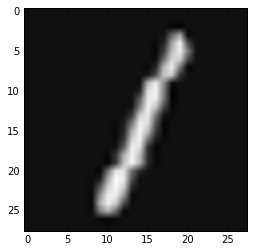

1


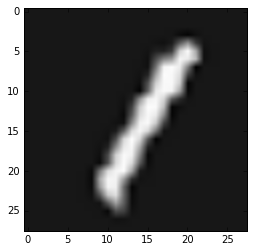

1


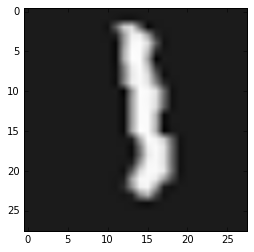

1


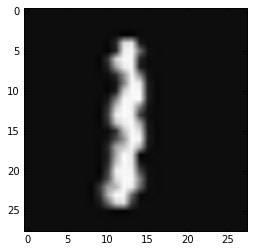

-1


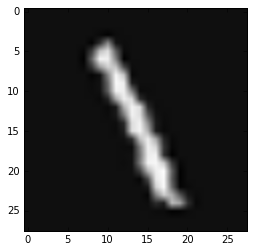

-1


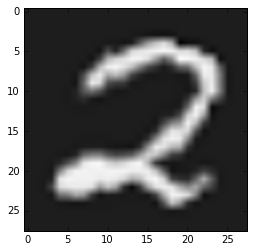

1


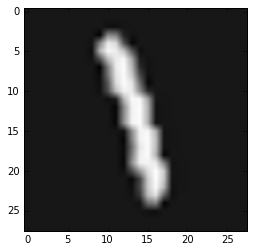

-1


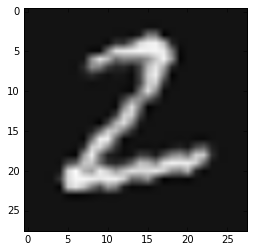

1


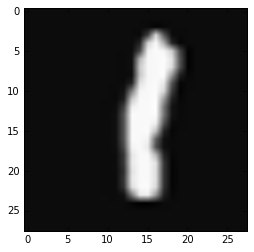

1


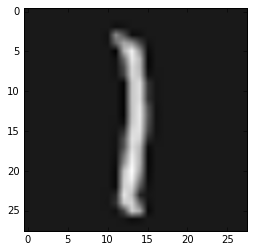

-1


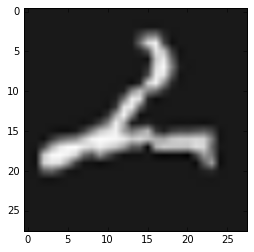

1


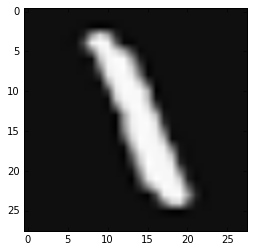

-1


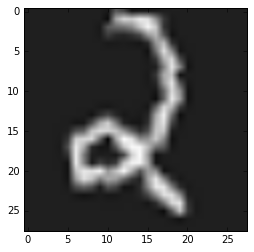

1


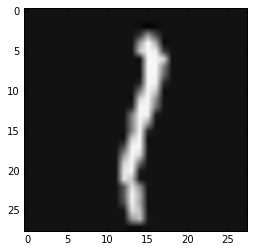

-1


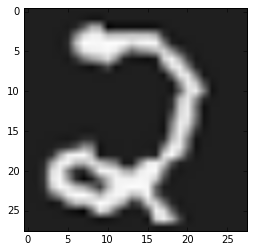

1


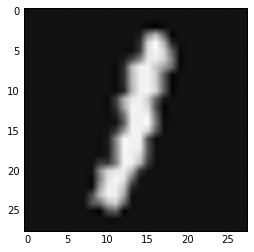

-1


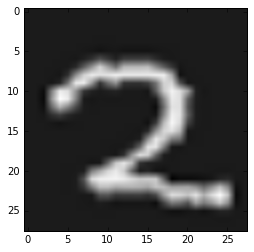

-1


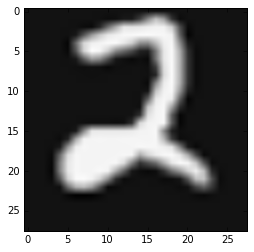

1


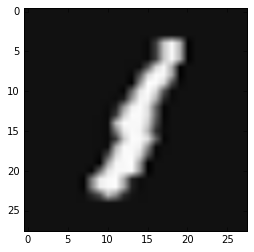

1


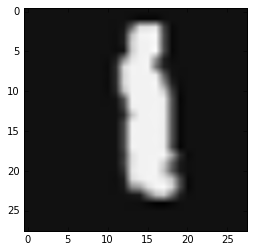

1


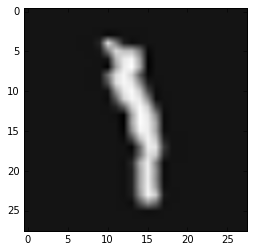

In [151]:
for i in range(len(Xte1)):
    print solution_SVM(Xte1[i],w)
    display_digit(Xte1[i])

In [165]:
def RBFKernel(x1, x2, sigma):
    xny = x1-x2
    Normxny = np.vdot(xny.T, xny)
    sim = np.exp(-Normxny/(2*pow(sigma,2)))
    return sim


In [174]:
def SVMPegasosGaussian(x,y,lambd,iterations, sigma):
    [m,d] = np.array(np.shape(x))
    alpha = np.zeros(m-1)
    for t in range(1, iterations + 1):
        it = random.randint(0, m-1)
        E = [RBFKernel(x[it], x[j], sigma) for j in range(0, m-1)]
        if pow(y[it],2)/(lambd*t)*np.vdot(alpha.T, E) < 1:
            alpha[it] = alpha[it] + 1
    alpha = alpha/(lambd*iterations)
    return alpha

def SolutionSVM_Gaussian(x, xt, yt, alpha, sigma):
    m = len(alpha)
    alphay = [alpha[k]*yt[k] for k in range(0, m-1)]
    E = [RBFKernel(xt[k], x, sigma) for k in range(0, m-1)]
    a = np.vdot(alphay, E)
    if a < 1:
        y = -1
    else:
        y = 1
    return y
    
    
##TODO rajouter b - ce serait plus logique


In [178]:
alpha = SVMPegasosGaussian(Xtr1, Ytr1, 0.001, 1000, 0.2)
for i in range(len(Xte1)):
    print SolutionSVM_Gaussian(Xte1[i], Xtr1, Ytr1, alpha, 0.2)

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


Regarder m-1 ou m début et fin des sommes et décalage des indices 
passer le code en pep8
Commencer le latex

TODO: 
- Lire RBF Bishop et Mairal
- Faire marcher RBF
- Faire one-against-all et one-against-one pour lineaire et RBF
- Essayer polynomial ? 
- Post